<a href="https://colab.research.google.com/github/soniyasingh87/PRODIGY_DS_Task04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [7]:
col_names = ['ID', 'Entity', 'Sentiment', 'Comment']
train_df=pd.read_csv("/content/twitter_training.csv",header=0, names=col_names)
test_df=pd.read_csv("/content/twitter_validation.csv",header=0, names=col_names)

In [8]:
train_df

,ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
68426,3717,Cyberpunk2077,Positive,LETS N GOOOOOOOOOO
68427,3717,Cyberpunk2077,Positive,she LETS IN FUCKING OF GOOOOOOOOOO
68428,3717,Cyberpunk2077,Positive,LETS FUCKING LI
68429,3718,Cyberpunk2077,Positive,I can’t wait for this to come out


In [9]:
test_df

,ID,Entity,Sentiment,Comment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
train_df.head()

,ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
train_df.tail()

,ID,Entity,Sentiment,Comment
68426,3717,Cyberpunk2077,Positive,LETS N GOOOOOOOOOO
68427,3717,Cyberpunk2077,Positive,she LETS IN FUCKING OF GOOOOOOOOOO
68428,3717,Cyberpunk2077,Positive,LETS FUCKING LI
68429,3718,Cyberpunk2077,Positive,I can’t wait for this to come out
68430,3718,Cyberpunk2077,Positive,I can't wait for


In [12]:
test_df.head()

,ID,Entity,Sentiment,Comment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [13]:
test_df.tail()

,ID,Entity,Sentiment,Comment
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68431 entries, 0 to 68430
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         68431 non-null  int64 
 1   Entity     68431 non-null  object
 2   Sentiment  68431 non-null  object
 3   Comment    67829 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [15]:
test_df.describe()

,ID
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [16]:
train_df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Comment      602
dtype: int64

In [17]:
test_df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Comment      0
dtype: int64

In [29]:
duplicates_train=train_df.duplicated().sum()
duplicates_validation=test_df.duplicated().sum()
duplicates_train,duplicates_validation

(2174, 0)

In [30]:
#removing the null values
train_df.dropna(subset=['Comment'],inplace=True)
train_df['Sentiment']=train_df['Sentiment'].replace('Irrelevant','Neutral')
test_df['Sentiment']=test_df['Sentiment'].replace('Irrelevant','Neutral')

In [32]:
duplicates_train=train_df.duplicated().sum()
duplicates_validation=test_df.duplicated().sum()
duplicates_train,duplicates_validation

(2174, 0)

In [33]:
train_df.ID.unique()

array([2401, 2402, 2403, ..., 3716, 3717, 3718])

In [34]:
test_df.ID.unique()

array([  352,  8312,  4371,  4433,  6273,  7925, 11332,  1107,  2069,
        3185,  1172, 11783,  4286,  8431,  9135,  4822,  3068, 10537,
        8056,  2131,  5450,  2286,  4038,   526,  8977, 11995,  9449,
       10193,  2419,  8857,  9704,  7024,  8842,  6650,  2337, 10589,
       12997,   807, 11229,  2366,  9268,  2216,   316,  1985, 11378,
        5207,  7048,  2274, 13197,  9488, 10275,  6022,  6379,  3293,
        5818,  1725,  8697,  2277, 11277, 11736,  1148, 11403,  3671,
        8558,  7023, 10227,  2243,  1908,  7740, 11020,  7082,  9608,
        8367,   861,   171,  9857,  9361,  2142,  4438,  8121,  4177,
         986, 12487,  7342,  4132,  5130, 10334,  5515, 11175,  5448,
        3286,  3929,   638,  2057,  9456, 11687,  1589,  3526,  8174,
       11693, 11086,  3948,  8822,   783,   465,  1714,  9850, 10078,
       10585, 10011,  5265,  3206,  3488, 11685,  5122,  9149,    96,
       11577,  3083,  2981,  4574,  3993,  1967,  2713,  8438, 10729,
        8984,  1990,

In [35]:
train_df.shape

(67829, 4)

In [36]:
test_df.shape

(999, 4)

In [37]:
train_df.size

271316

In [38]:
test_df.size

3996

In [39]:
sentiment_counts=train_df['Sentiment'].value_counts().sort_index()
sentiment_labels=['Negative','Neutral','Positive']
sentiment_colors=['black','cyan','red']
figure=go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                              values=sentiment_counts.values,
                              textinfo='percent+value+label',
                              marker_colors=sentiment_colors,
                              textposition='auto',
                              hole=.4)])
figure.update_layout(title_text='Sentiment Distribution Chart',
                     template='plotly_white',
                     xaxis=dict(
                         title='Sources',
                         ),
                     yaxis=dict(
                         title='Number of posts in Twitter',
                         )
                     )
figure.update_traces(marker_line_color='black',
                     marker_line_width=1.5,
                     opacity=0.8)
figure.show()

In [40]:
top10_entitycount=train_df['Entity'].value_counts().sort_values(ascending=False)[:10]
figure=px.bar(x=top10_entitycount.index,
              y=top10_entitycount.values,
              color=top10_entitycount.values,
              text=top10_entitycount.values,
              color_continuous_scale='Blues')
figure.update_layout(
    title_text='Top 10 Entity Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Entity',
    ),
    yaxis=dict(
        title='Number of posts in Twitter',
    )
)
figure.update_traces(marker_line_color='black',
                     marker_line_width=1.0,
                     opacity=1.0)
figure.show()

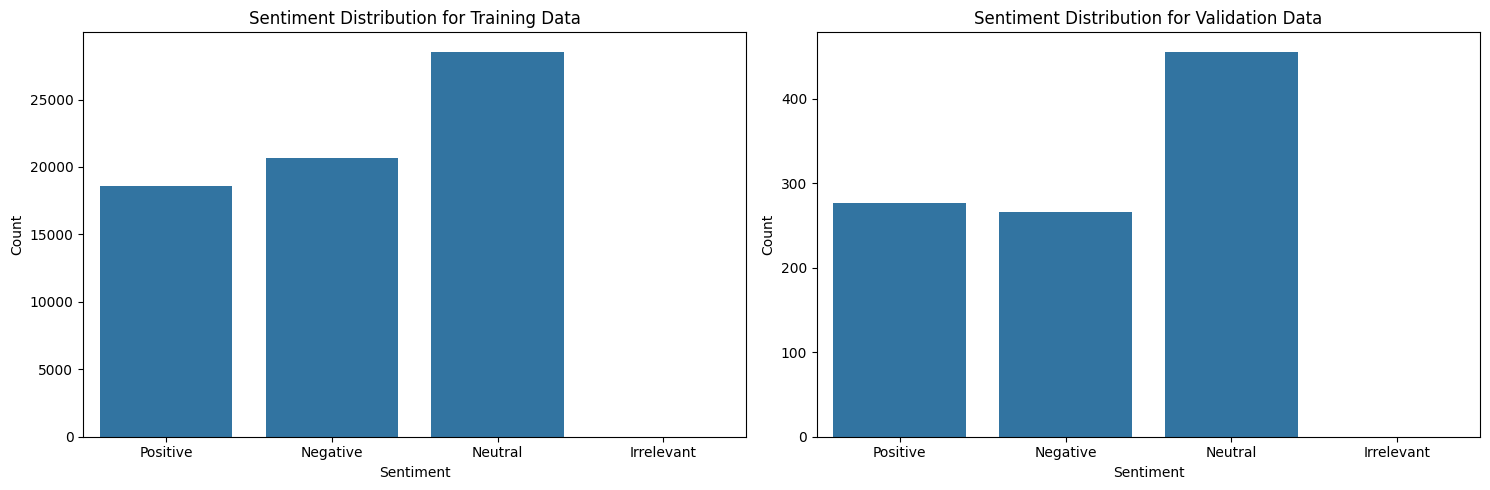

In [44]:
figure,ax=plt.subplots(1,2,figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_df,x=train_df.columns[2],order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution for Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=test_df,x=test_df.columns[2],order=['Positive', 'Negative', 'Neutral', 'Irrelevant'],ax=ax[1])
ax[1].set_title('Sentiment Distribution for Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')
plt.tight_layout()
plt.show()

<ipython-input-59-68404c1f8925>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




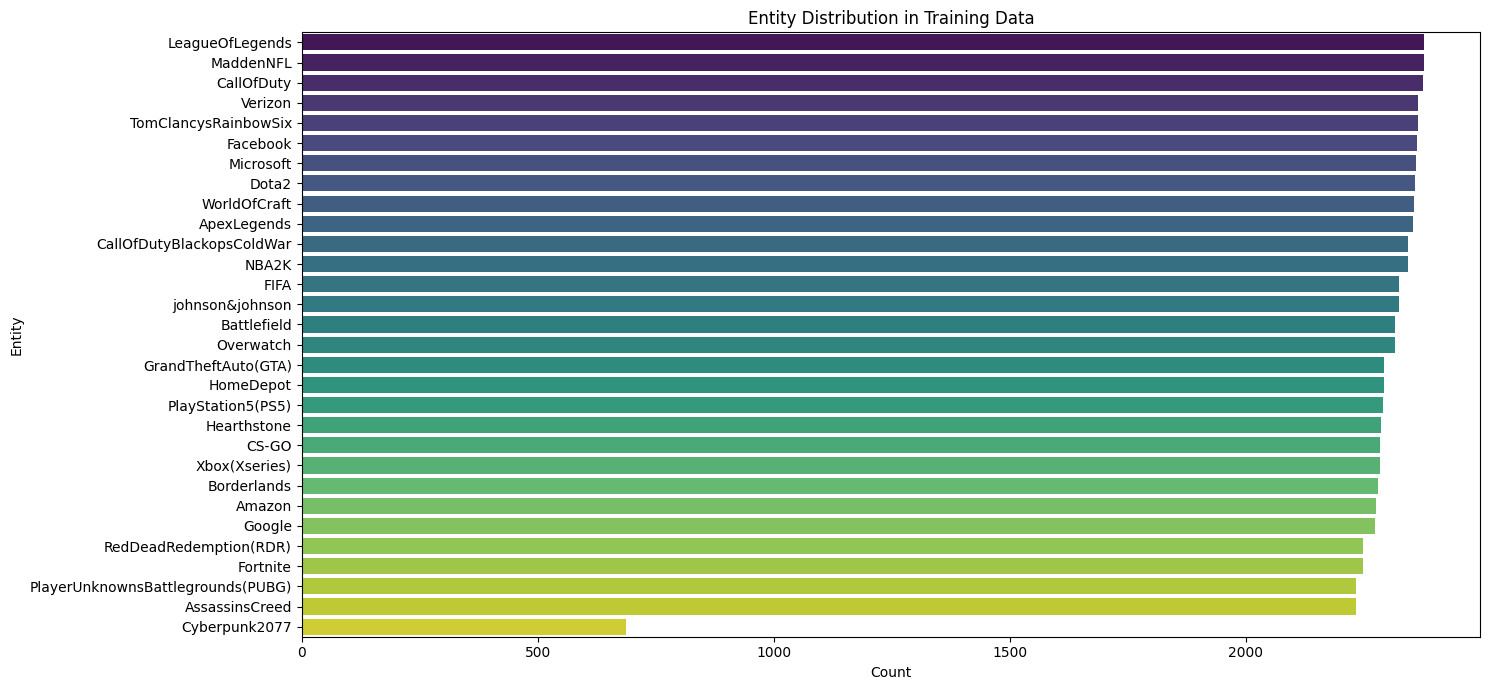

In [59]:
plt.figure(figsize=(15, 7))
sns.countplot(data=train_df,y=train_df.columns[1],order=train_df[train_df.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [49]:
train_df['message_length'] = train_df[train_df.columns[3]].apply(len)
test_df['message_length'] = test_df[test_df.columns[3]].apply(len)

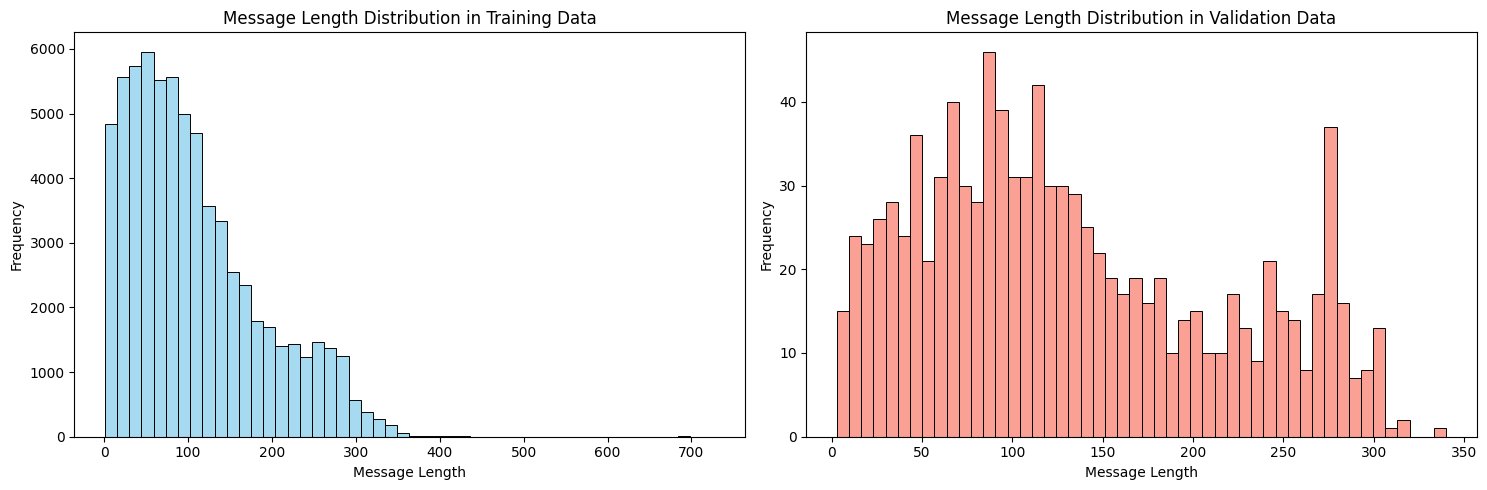

In [51]:
fig,ax=plt.subplots(1,2,figsize=(15, 5))

# Plot message length distribution for training data
sns.histplot(train_df['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(test_df['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')
plt.tight_layout()
plt.show()

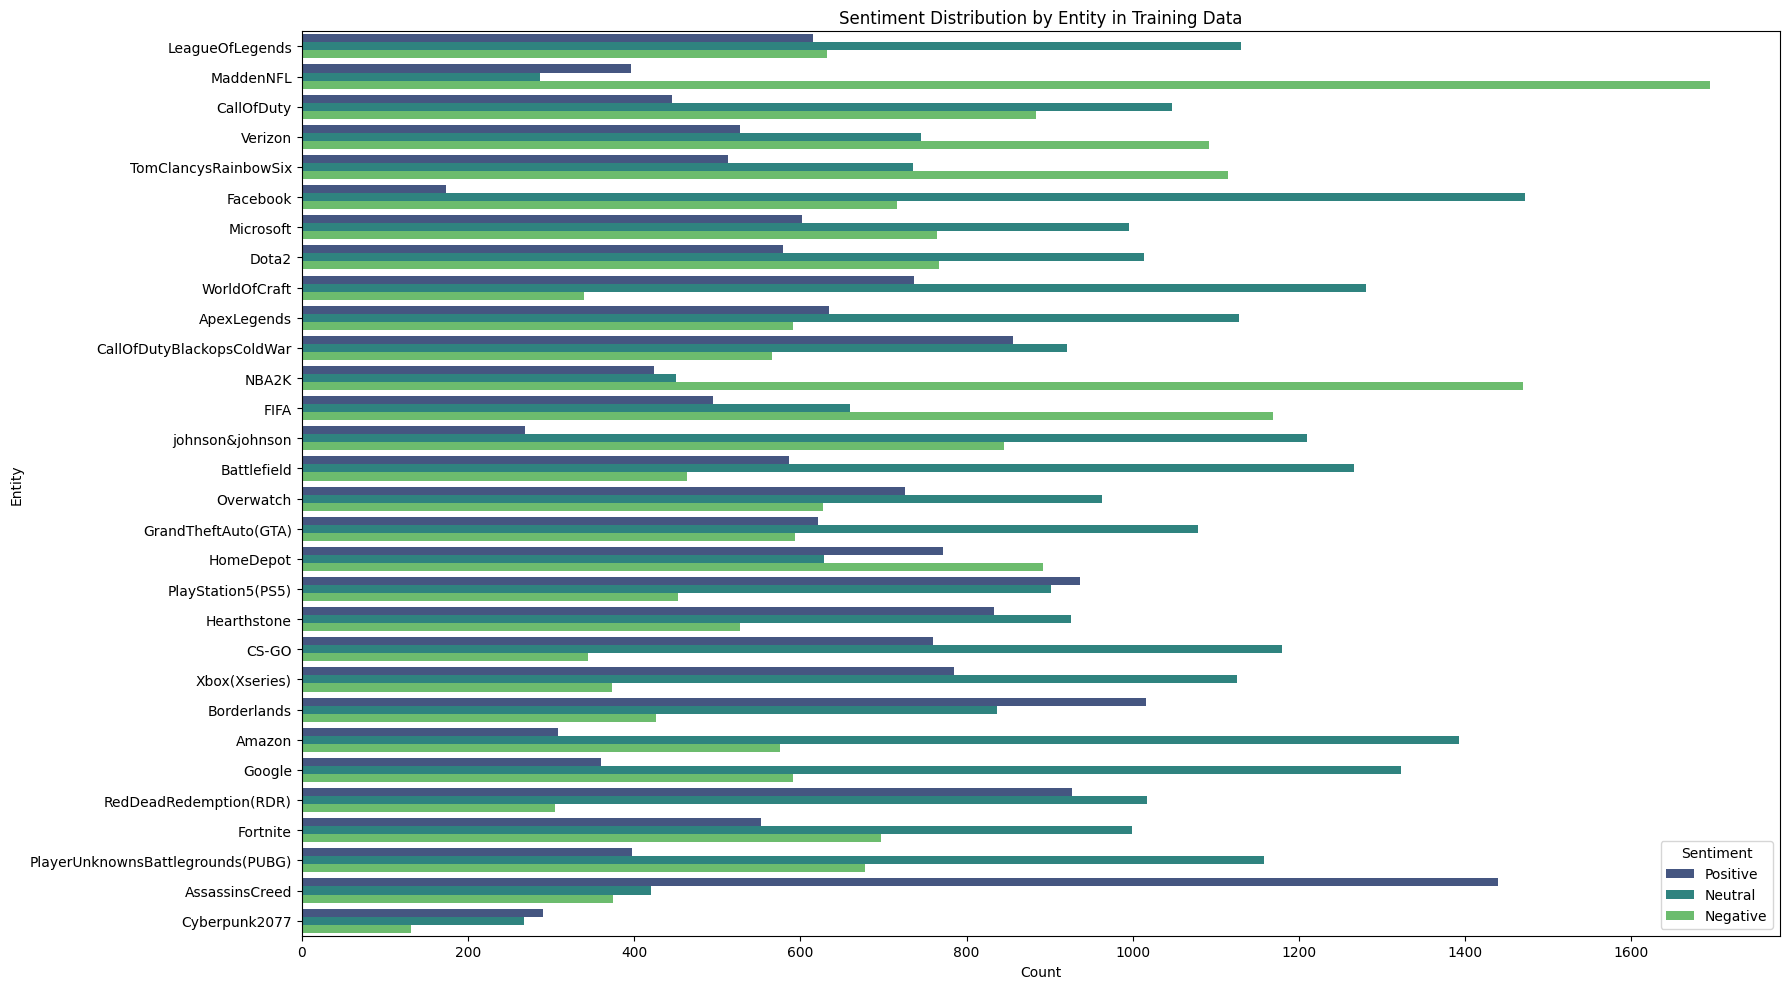

In [52]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=train_df,y=train_df.columns[1],hue=train_df.columns[2],order=train_df[train_df.columns[1]].value_counts().index,palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<ipython-input-57-941c5142e6c1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-57-941c5142e6c1>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




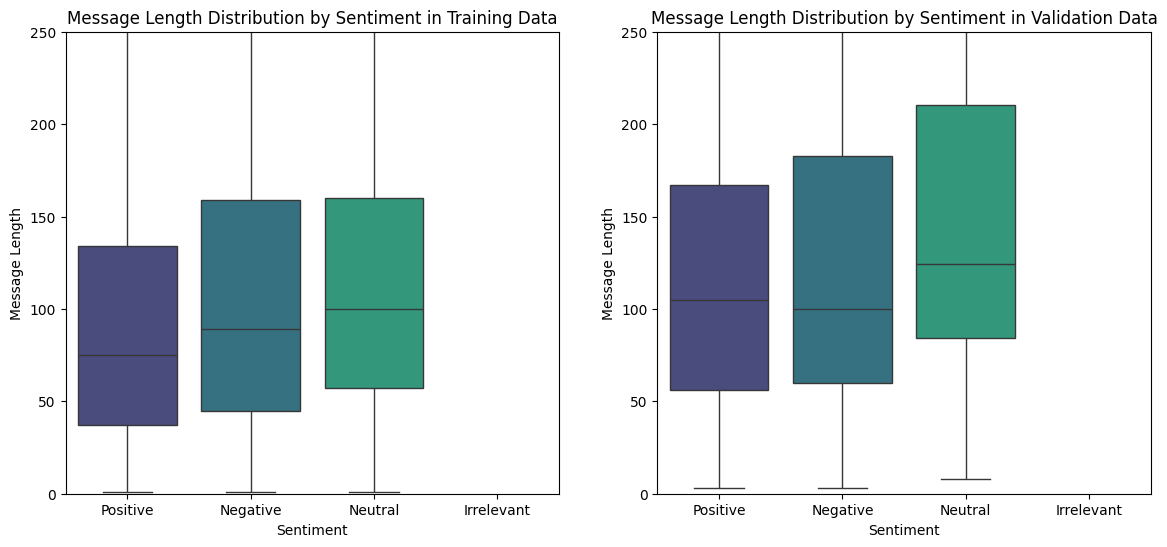

In [57]:
figure,ax = plt.subplots(1,2,figsize=(14,6))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_df,x=train_df.columns[2],y='message_length',ax=ax[0],palette='viridis',order=['Positive','Negative','Neutral','Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0,250)

# Plot message length distribution by sentiment for validation data
sns.boxplot(data=test_df,x=test_df.columns[2],y='message_length',ax=ax[1],palette='viridis',order=['Positive','Negative','Neutral','Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0,250)
plt.show()